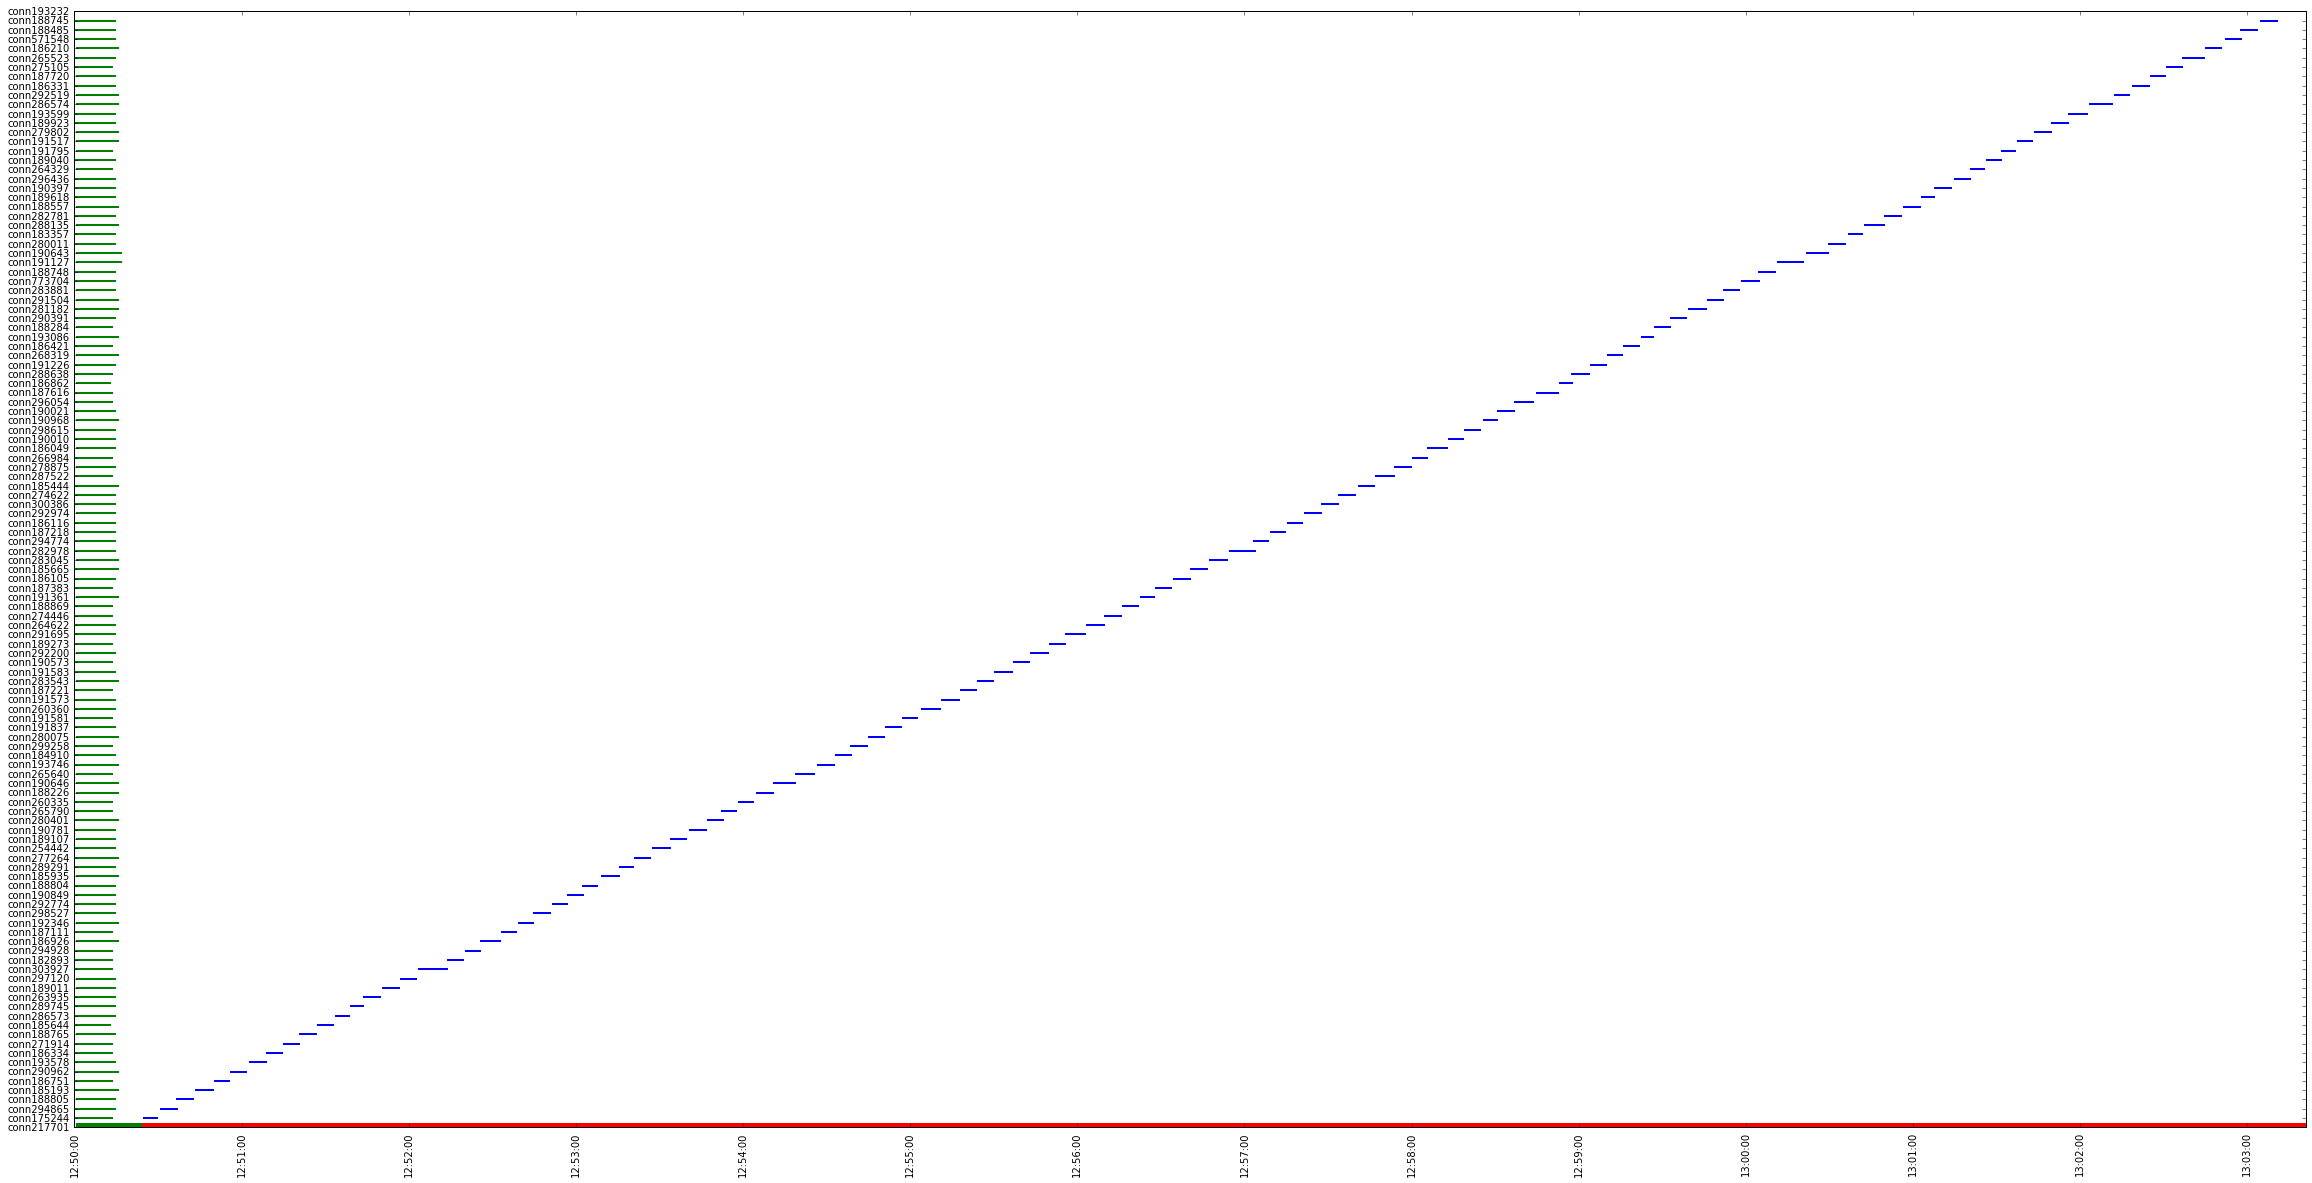

In [1]:
%matplotlib inline

import csv
import datetime

import matplotlib.pyplot as plt
from matplotlib import dates

data_filenames = ['primary_shard', 'first_batch', 'second_batch']

def process_file(filename):
    with open('./%s.log' % filename, newline='') as f:
        r = csv.reader(f, delimiter=' ')
        result = {
            'names': [],
            'start_times': [],
            'end_times': []
        }
        for row in r:
            # format 2016-07-01T12:50:25.011+0000 [conn217701] 24307ms
            end_time_str = row[0]
            conn_name = row[1][1:-1]
            elasped_time_ms = int(row[2][:-2])
            end_time = datetime.datetime(
                int(end_time_str[:4]), 
                int(end_time_str[5:7]), 
                int(end_time_str[8:10]), 
                int(end_time_str[11:13]), 
                int(end_time_str[14:16]), 
                int(end_time_str[17:19]), 
                int(end_time_str[20:23])
            )
            start_time = end_time - datetime.timedelta(seconds=elasped_time_ms//1000, microseconds=(elasped_time_ms%1000)*1000)
            result['names'].append(conn_name)
            result['start_times'].append(start_time)
            result['end_times'].append(end_time)
        return result

ps, fb, sb = map(process_file, data_filenames)

yaxis_ticks = [ps['names'][0]] + sb['names'] # ensure good display of the graph
yaxis_ticks.extend([ name for name in fb['names'] if not name in yaxis_ticks])

sfmt = dates.DateFormatter('%H:%M:%S')

fig = plt.figure(figsize=(40,20))

f = fig.add_subplot(111)
# first batch for primary shard
f.hlines([0], ps['start_times'][0], ps['end_times'][0], linewidth=8, color='green')
# second batch for primary shard
f.hlines([0], ps['start_times'][1], ps['end_times'][1], linewidth=8, color='red')
# first batch
f.hlines([yaxis_ticks.index(name) for name in fb['names']], fb['start_times'], fb['end_times'], linewidth=2, color='green')
# second batch
f.hlines([yaxis_ticks.index(name) for name in sb['names']], sb['start_times'], sb['end_times'], linewidth=2, color='blue')

f.xaxis.set_major_locator(dates.MinuteLocator())
f.xaxis.set_major_formatter(sfmt)

plt.xticks(rotation='vertical')
plt.yticks(list(range(len(yaxis_ticks))), yaxis_ticks)

plt.show()